In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
import numpy as np
import math as mt
import seaborn as snc
from ipywidgets import interact
%matplotlib inline


In [2]:
file = open("data.csv", "r")

In [14]:
#read data and update the column names
data = pd.read_csv("data.csv", header = 1)
data = data.rename(columns = {'default payment next month': 'default'})


array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [16]:
#Recode education to only 4 variables
data['EDUCATION'] = np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

data['EDUCATION'] = np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])

data['EDUCATION'].unique()


array([2, 1, 3, 4, 6], dtype=int64)

In [17]:
#statistical description of the dataset
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.845667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.758771,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [34]:
#Unique values count
data.LIMIT_BAL.value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
150000     1110
100000     1048
180000      995
360000      881
60000       825
140000      749
230000      737
70000       731
210000      730
130000      729
120000      726
500000      722
160000      694
90000       651
240000      619
110000      588
300000      554
170000      532
260000      521
280000      493
10000       493
220000      469
250000      350
290000      348
320000      312
           ... 
520000       20
510000       19
600000       16
580000       11
610000       11
530000       10
560000       10
620000        9
700000        8
570000        8
630000        7
640000        7
540000        6
590000        6
710000        6
680000        4
750000        4
650000        3
670000        3
720000        3
660000        3
16000         2
780000        2
740000        2
730000        2
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length:

In [38]:
#Potential outlier
data[data.LIMIT_BAL == 1000000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


Text(0.5, 1.0, 'Boxplot of Credit amount')

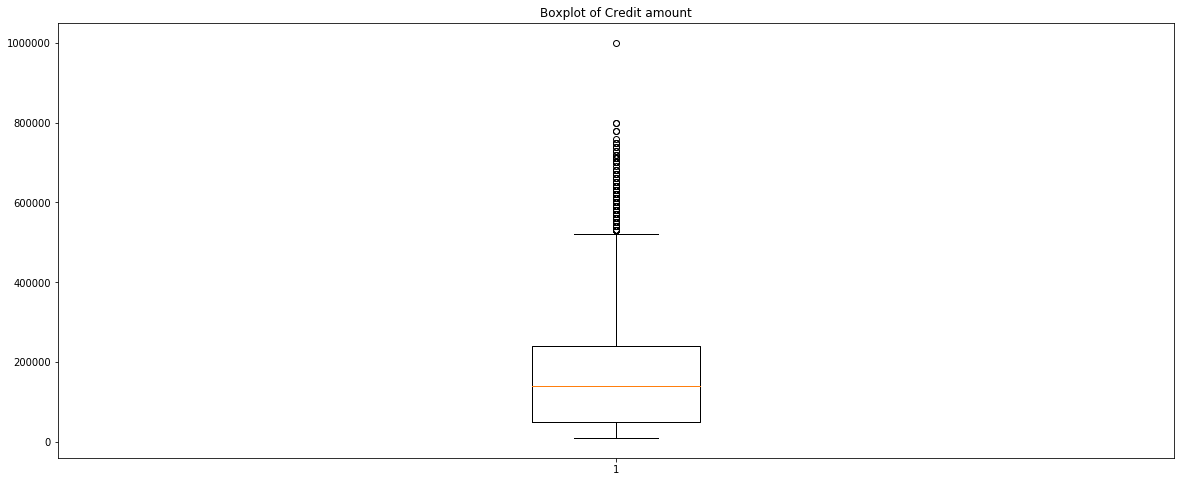

In [193]:
# Set default matplot figure size
plt.rcParams['figure.figsize'] = (20.0, 8.0)
x = data['LIMIT_BAL']
y = data['default']
z = data['AGE']
plt.scatter(z, x, color = "red")
scatterplot = plt.title('Education vs default chance%')

plt.boxplot(data['LIMIT_BAL'])
plt.title('Boxplot of Credit amount')



,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIMIT_BAL,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.819835,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819835,1.000000,0.8169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.816900,1.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


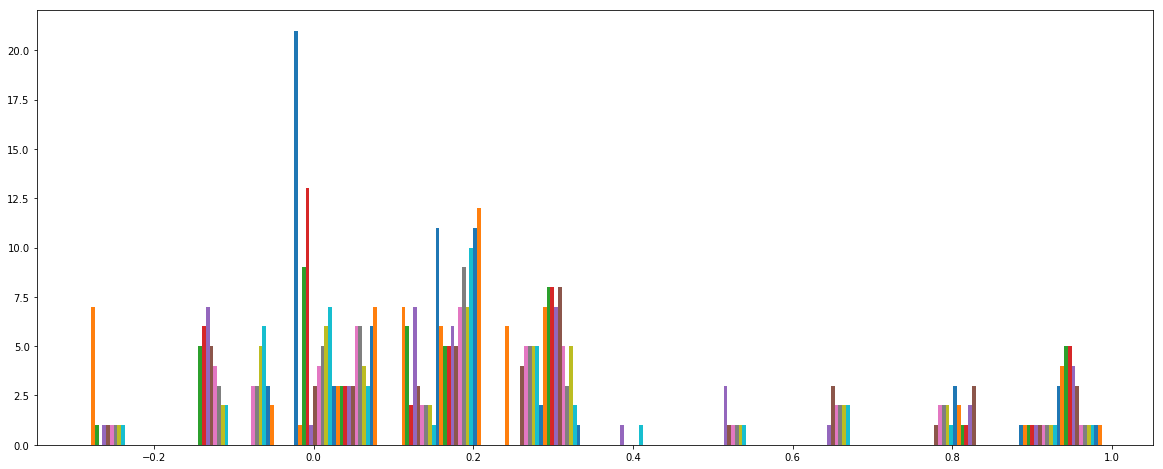

In [202]:
rel = data.corr()  #no worringsome 
plt.hist(rel)

cov = data.cov()


#correlations above 0.8 - the bill payments from previous years, consider taking them out
rel[rel > 0.8]

KeyboardInterrupt: 